# Review Data EDA

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from glob import glob

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")

In [2]:
def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text))

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib
font = {'size' : 50}
matplotlib.rc('font', **font)

TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

day_labels = ['MON','TUE','WED','THU','FRI','SAT','SUN']
day_labels_full = ['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']
month_labels = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
month_labels_full = ['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']

FIG_SIZE = (15,6)
FIG_SIZE_SHORT = (15,3)
GRID_DIMS = 15

DO_WRITE_CHARTS = False

# Load Review Data

In [4]:
time_marker(text='Loading Review Data...')

reviews = pd.DataFrame()
file_path_slug = '../clean_data/reviews/*.csv'
file_list = glob(file_path_slug)


# Chunk Settings
chunks = list()
chunksize = 10000
for ii, file in enumerate(sorted(file_list)):
    time_marker('Reading {} of {} {}...'.format(ii+1, len(file_list), file))
    num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)
    format_width = len(str(num_chunks))

    # import file in chunks
    for jj, chunk in enumerate(pd.read_csv(file, chunksize=chunksize, iterator=True, index_col=0, parse_dates=['date'])):

        # drop reviews with missing review text
        chunk = chunk[(~chunk.text.isnull()) & (~chunk.user_id.isnull())].copy()
        
        # append chunk to chunks list
        chunks.append(chunk)
        
time_marker(text='merging to dataframe...')
reviews = pd.concat(chunks)

time_marker('reseting index...')
reviews.reset_index(inplace=True, drop=True)
time_marker(text='Complete!')


[21:35:18.420968] Loading Review Data...
[21:35:18.427663] Reading 1 of 64 ../clean_data/reviews/00_-_reviews_clean.csv...
[21:35:20.042073] Reading 2 of 64 ../clean_data/reviews/01_0_reviews_clean.csv...
[21:35:21.611762] Reading 3 of 64 ../clean_data/reviews/02_1_reviews_clean.csv...
[21:35:22.838381] Reading 4 of 64 ../clean_data/reviews/03_2_reviews_clean.csv...
[21:35:24.065913] Reading 5 of 64 ../clean_data/reviews/04_3_reviews_clean.csv...
[21:35:25.574859] Reading 6 of 64 ../clean_data/reviews/05_4_reviews_clean.csv...
[21:35:26.922628] Reading 7 of 64 ../clean_data/reviews/06_5_reviews_clean.csv...
[21:35:28.368421] Reading 8 of 64 ../clean_data/reviews/07_6_reviews_clean.csv...
[21:35:29.692336] Reading 9 of 64 ../clean_data/reviews/08_7_reviews_clean.csv...
[21:35:31.032349] Reading 10 of 64 ../clean_data/reviews/09_8_reviews_clean.csv...
[21:35:32.219126] Reading 11 of 64 ../clean_data/reviews/10_9_reviews_clean.csv...
[21:35:33.513875] Reading 12 of 64 ../clean_data/review

In [8]:
reviews['date'] = pd.to_datetime(reviews['date'])

reviews['cool']             = reviews['cool'].astype(int)
reviews['funny']            = reviews['funny'].astype(int)
reviews['stars']            = reviews['stars'].astype(int)

reviews['useful'].fillna(0, inplace=True)
reviews['useful']           = reviews['useful'].astype(int)

reviews['review_length']    = reviews['review_length'].astype(int)

In [17]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,review_length
0,-MhfebM0QIsKt87iDN-FNw,0,2012-08-10,0,tFf1QKZ8MR6gIC4Z2ekDVg,1,sadly my wife and i attended last nights wine ...,2,PIKBAhQq7OyJsvkHsbn9Iw,1162
1,-MhfebM0QIsKt87iDN-FNw,5,2012-02-27,5,Ahr7sNdGkNsDgOK3N4yRwQ,4,the bellagio gallery of fine art is small and ...,7,HFECrzYDpgbS5EmTBtj2zQ,576
2,-MhfebM0QIsKt87iDN-FNw,1,2013-01-04,0,yRuhN1lSAeFVD3qWtbuW5g,4,a touch of true not manufactured french impres...,1,pngNlr9t4HObDgecGH_jaw,1187
3,-MhfebM0QIsKt87iDN-FNw,0,2013-05-11,1,RaSU-d08Y2ywamgI3TOeRA,2,2 stars for the andy warhol exhibits value in ...,1,eZZyuJDouIg4p-GYB3PV_A,461
4,-MhfebM0QIsKt87iDN-FNw,0,2015-08-18,0,O467QnXRMUhGezSU7y1VPQ,5,bellagio prides itself on being one of the bes...,2,NqwJWpIcnp4pw53JW4buLg,1023


In [18]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4736882 entries, 0 to 4736881
Data columns (total 10 columns):
business_id      object
cool             int64
date             datetime64[ns]
funny            int64
review_id        object
stars            int64
text             object
useful           int64
user_id          object
review_length    int64
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 361.4+ MB


In [19]:
for col in reviews.columns:
    print('{} unique {} values'.format(str(len(reviews[col].unique())).rjust(10), col.ljust(12)))

    156638 unique business_id  values
       160 unique cool         values
      4409 unique date         values
       152 unique funny        values
   4736882 unique review_id    values
         5 unique stars        values
   4733869 unique text         values
       205 unique useful       values
   1183362 unique user_id      values
      4938 unique review_length values


# Exploratory Data Analysis

# Annual Growth

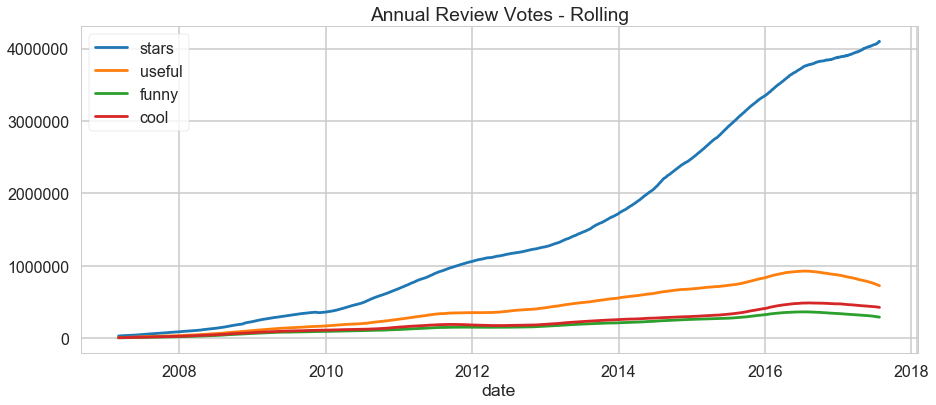

In [22]:
reviews_df = reviews[['date', 'stars', 'useful' , 'funny', 'cool']].copy()
reviews_by_date = reviews_df.groupby('date').sum()
reviews_by_date.head(3)

ax = reviews_by_date.resample('D').sum().rolling(365).sum().plot(figsize=FIG_SIZE)
ax.legend(loc=2, frameon=True)
ax.set_title('Annual Review Votes - Rolling')
plt.show()
plt.close()

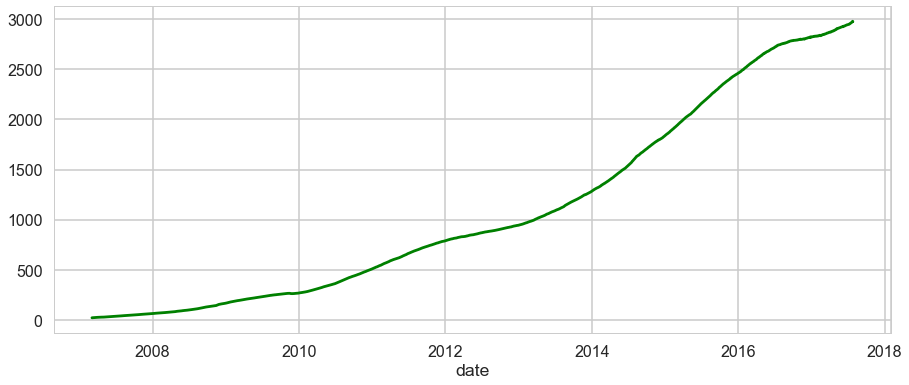

In [23]:
plt.subplots(figsize=FIG_SIZE)
ax = reviews.groupby(reviews.date).count()['user_id'].resample('D').sum().rolling(365).mean().plot(color='g')
plt.show()
plt.close()

# Simple Recommenders
<ul>
    <li>Decide on the metric or score to rate reviews on</li>
    <li><b>IMDB Top 250 Rattin Weights</b></li>
</ul>

<ul>
    <li>Calculate score on every review</li>
    <li></li>
</ul>

<ul>
    <li>sort movies based on that score, output top ten</li>
    <li></li>
</ul>

In [74]:

time_marker('v = number of reviews...')
v = reviews.groupby('business_id').count()['review_id']

time_marker('m = min_rating_for_consideration - top 90th percentile in this case is the cutoff...')
m = reviews.groupby('business_id').count()['review_id'].quantile(0.90)

time_marker('R = business_average_rating...')
R = reviews.groupby('business_id').mean()['stars']

time_marker('C = global_mean_rating...')
C = reviews.stars.mean()

[23:18:45.066481] v = number of reviews...
[23:18:48.579655] m = min_rating_for_consideration - top 90th percentile in this case is the cutoff...
[23:18:51.151993] R = business_average_rating...
[23:18:53.388213] C = global_mean_rating...


In [76]:
def get_weighted_rating(v, m , R, C):
    weighted_rating = (v / (v+m) * R) + (m/(v+m)*C)
    
    return weighted_rating

## Get subset of business with review counts in the top 90th percentile

In [77]:
# select reviews of businesses in top 90th percentile
review_counts = reviews.groupby('business_id').count()['review_id'].to_frame()
review_counts = review_counts[review_counts.review_id >= reviews.groupby('business_id').count()['review_id'].quantile(0.90)]

top_90_bid = list(review_counts.index)

top_90th = reviews[reviews['business_id'].isin(top_90_bid)].copy()

top_90th.reset_index(inplace=True, drop=True)
top_90th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921654 entries, 0 to 2921653
Data columns (total 10 columns):
business_id      object
cool             int64
date             datetime64[ns]
funny            int64
review_id        object
stars            int64
text             object
useful           int64
user_id          object
review_length    int64
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 222.9+ MB
